In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline

In [2]:
water_level_df = pd.read_csv("https://raw.githubusercontent.com/stho382/ENGSCI_263_group_3_CM/main/data/gr_p.txt?token=APIMSVRGINTROPGUWYO7IJTBBGZMO")
total_production_df = pd.read_csv("https://raw.githubusercontent.com/stho382/ENGSCI_263_group_3_CM/main/data/gr_q1.txt?token=APIMSVSEKVUYUKOZFWOJOULBBGZPI") 
rhyolite_production_df = pd.read_csv("https://raw.githubusercontent.com/stho382/ENGSCI_263_group_3_CM/main/data/gr_q2.txt?token=APIMSVQ4433NUDJEKCG4N6TBBGZRG")
temperature_df = pd.read_csv("https://raw.githubusercontent.com/stho382/ENGSCI_263_group_3_CM/main/data/gr_T.txt?token=APIMSVQGLYYQQHWWX3XNTC3BBGZTE")

In [3]:
water_level_df.head()

,year,water level (m)
0,1984.75,294.787
1,1985.11,295.009
2,1985.72,294.362
3,1986.20,294.805
4,1986.59,294.222


In [4]:
total_production_df.head()

,year,production rate (tonnes/day)
0,1950.51,66.5399
1,1951.73,199.6200
2,1952.94,465.7790
3,1953.90,731.9390
4,1955.30,998.0990


In [5]:
rhyolite_production_df.head()

,year,production rate (tonnes/day)
0,1950.32,132.500
1,1954.16,527.054
2,1955.51,658.507
3,1958.45,1386.040
4,1961.46,1515.800


In [6]:
temperature_df.head()

,year,temperature [degC]
0,1960,149.0
1,1965,145.0
2,1970,147.0
3,1975,144.0
4,1980,141.0


Text(0.5, 1.0, 'Water level data from Rotorua Geothermal System')

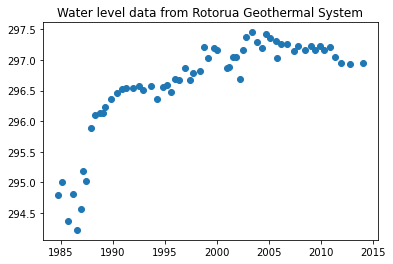

In [7]:
plt.scatter(water_level_df["year"], water_level_df["water level (m)"])
plt.title("Water level data from Rotorua Geothermal System")

Text(0.5, 1.0, 'Total production data from near Whakarewarewa')

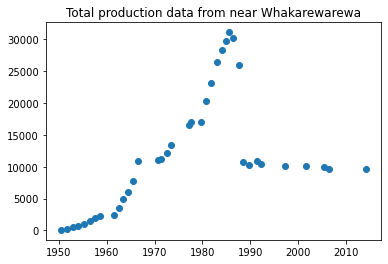

In [9]:
plt.scatter(total_production_df["year"], total_production_df["production rate (tonnes/day)"])
plt.title("Total production data from near Whakarewarewa")

Text(0.5, 1.0, 'Rhyolite production data from near Whakarewarewa')

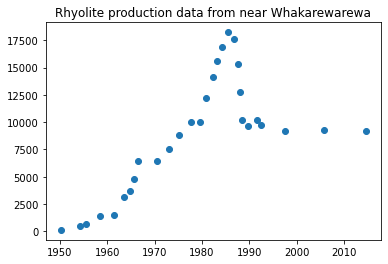

In [10]:
plt.scatter(rhyolite_production_df["year"], rhyolite_production_df["production rate (tonnes/day)"])
plt.title("Rhyolite production data from near Whakarewarewa")

Text(0.5, 1.0, 'Temperature Monitoring data from near Whakarewarewa')

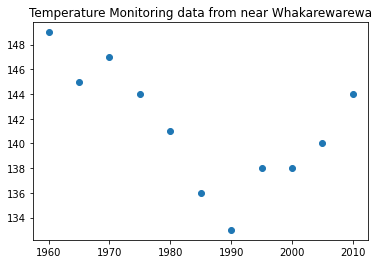

In [11]:
plt.scatter(temperature_df["year"], temperature_df.iloc[:,1])
plt.title("Temperature Monitoring data from near Whakarewarewa")

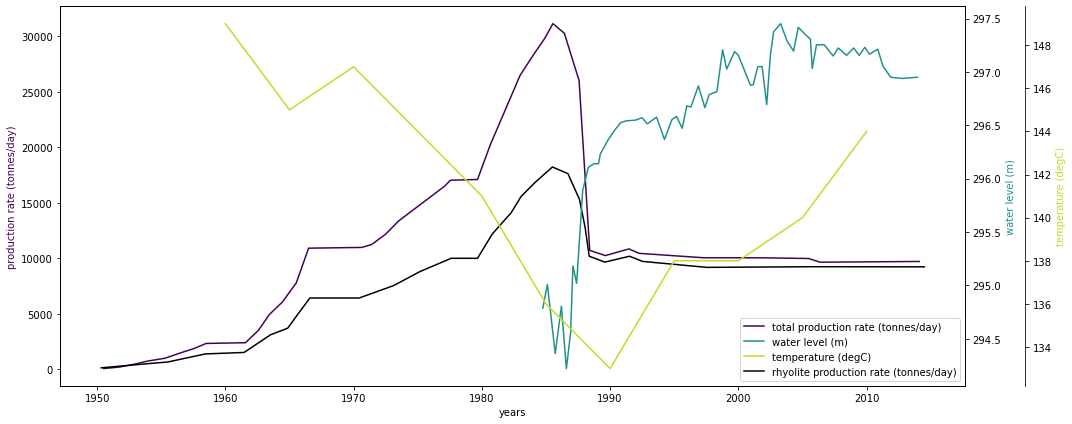

In [12]:
# Create figure and subplot manually
# fig = plt.figure()
# host = fig.add_subplot(111)

# More versatile wrapper
fig, host = plt.subplots(figsize=(15,6)) # (width, height) in inches
# (see https://matplotlib.org/3.3.3/api/_as_gen/matplotlib.pyplot.subplots.html)
    
par1 = host.twinx()
par2 = host.twinx()
    
#host.set_xlim(0, 2)
#host.set_ylim(0, 2)
#par1.set_ylim(0, 4)
#par2.set_ylim(1, 65)
    
host.set_xlabel("years")
host.set_ylabel("production rate (tonnes/day)")
par1.set_ylabel("water level (m)")
par2.set_ylabel("temperature (degC)")

color1 = plt.cm.viridis(0)
color2 = plt.cm.viridis(0.5)
color3 = plt.cm.viridis(.9)
color4 = plt.cm.magma(0)

p1, = host.plot(total_production_df["year"], total_production_df.iloc[:,1], color=color1, label="total production rate (tonnes/day)")
p2, = par1.plot(water_level_df["year"], water_level_df.iloc[:,1], color=color2, label="water level (m)")
p3, = par2.plot(temperature_df["year"], temperature_df.iloc[:,1], color=color3, label="temperature (degC)")
p4, = host.plot(rhyolite_production_df["year"], rhyolite_production_df.iloc[:,1], color=color4, label="rhyolite production rate (tonnes/day)")

lns = [p1, p2, p3, p4]
host.legend(handles=lns, loc='lower right')

# right, left, top, bottom
par2.spines['right'].set_position(('outward', 60))

# no x-ticks                 
#par2.xaxis.set_ticks([])

# Sometimes handy, same for xaxis
#par2.yaxis.set_ticks_position('right')

# Move "Velocity"-axis to the left
# par2.spines['left'].set_position(('outward', 60))
# par2.spines['left'].set_visible(True)
# par2.yaxis.set_label_position('left')
# par2.yaxis.set_ticks_position('left')

host.yaxis.label.set_color(p1.get_color())
par1.yaxis.label.set_color(p2.get_color())
par2.yaxis.label.set_color(p3.get_color())

# Adjust spacings w.r.t. figsize
fig.tight_layout()
# Alternatively: bbox_inches='tight' within the plt.savefig function 
#                (overwrites figsize)

# Best for professional typesetting, e.g. LaTeX
plt.savefig("pyplot_multiple_y-axis.png")
# For raster graphics use the dpi argument. E.g. '[...].png", dpi=200)'